In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial as plnm

In [2]:
f = lambda x: np.exp(2*x) - 1
def Taylor(n):
    power, fact = 1, 1
    while n:
        power, fact = power*2, fact*n
        n -= 1
    return power/fact

In [3]:
def get_n(eps: np.float64) -> int:
    n = 1
    power, fact = 1, 1
    while power/fact >= eps:
        power, fact = power*2, fact*n
        n += 1
    return n-1

def Cheb2Poly(n):
    arr = [0]*n + [1]
    cheb = plnm.chebyshev.Chebyshev(arr)
    poly = plnm.Polynomial(plnm.chebyshev.cheb2poly(cheb.coef))
    return poly

def Economise(P):
    tmpCheb = Cheb2Poly(P.degree())
    PRes = P.cutdeg(P.degree()-1) - P.coef[-1]/(tmpCheb.coef[-1]) * tmpCheb.cutdeg(P.degree()-1)
    return PRes

In [75]:
eps = 1e-8
n = get_n(eps) - 1
a = [Taylor(i) for i in range(1, n+1)]
P0 = plnm.Polynomial([0] + a)
P = [P0]
print(P0.degree(), n)
for i in range(4):
    P.append(Economise(P[-1]))

15 15


In [86]:
def PrintErr(K, col):
    axs.plot(x_data, [f(x_data[i]) - K.linspace(1000)[1][i] for i in range(len(x_data))],
             label='$P_{}(x)$'.format(i),
             linewidth=1,
             color=col)

def PrintP(K, col):
    axs.plot(x_data, K.linspace(1000)[1], color=col)

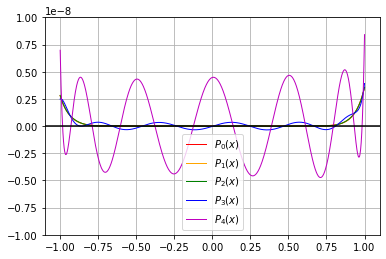

In [95]:
x_data = np.linspace(-1, 1, 1000)
fig, axs = plt.subplots()

#axs.plot(x_data, f(x_data), label="$f(x)$", color="blue")

colors = ['r', 'orange', 'g', 'b', 'm']

for i in range(len(P)):
    #PrintP(P[i], colors[i%5])
    PrintErr(P[i], colors[i%5])

ax = plt.gca()
ax.axhline(y=0, color='k')
axs.set(ylim=(-eps, eps))
axs.legend()
axs.grid(True)
#plt.savefig("plot_4.3_err.png", dpi=500)